# Project: Wrangling and Analyze Data

In [1]:
# import libraries that and packages necesarry for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json as js
import time
from timeit import default_timer as timer
%matplotlib inline


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# download twitter archive into workspace
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image-predictions.tvs'), 'wb') as file:
    file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image-predictions.tvs', delimiter='\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# create an API object
consumer_key = '***'
consumer_secret = '***'
access_token = '***'
access_secret = '***'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            js.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 296


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 345


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [7]:
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = js.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [8]:
tweet_count_df = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])
tweet_count_df.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,6990,33777
1,892177421306343426,5293,29296
2,891815181378084864,3470,22029
3,891689557279858688,7216,36895
4,891327558926688256,7743,35267


## Assessing Data
In this section,  I detected and documented at least **nine (9) quality issues and two (2) tidiness issue**.



### Visual Assessment

In [9]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweet_count_df

,id_str,retweet_count,favorite_count
0,892420643555336193,6990,33777
1,892177421306343426,5293,29296
2,891815181378084864,3470,22029
3,891689557279858688,7216,36895
4,891327558926688256,7743,35267
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


### Programmatic Assessment

In [12]:
# Explore twitter archive to check number of entries for the columns
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# Explore image predictions to check number of entries for the columns
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
# Explore tweet count dataframe to check number of entries for the columns
tweet_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_str          2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [15]:
twitter_archive_df.shape

(2356, 17)

In [16]:
twitter_archive_df.name.value_counts().head(50)

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Name: name, dtype: int64

In [17]:
# check for duplicated values(s) in the tweet_id column and show duplicate(s) in the twitter archive dataframe

twitter_archive_df[twitter_archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
# check for the value count in doggo column
twitter_archive_df.doggo.value_counts().head()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
# check for the value count in floofer column
twitter_archive_df.floofer.value_counts().head()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
# check for the value count in pupper column
twitter_archive_df.pupper.value_counts().head()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
# check for the value count in puppo column
twitter_archive_df.puppo.value_counts().head()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
# check for duplicated values(s) in the tweet_id column and show duplicate(s) in image predictions dataframe
image_predictions_df[image_predictions_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [23]:
# check for the value count in the flooper column

### Quality issues

#### Twitter archive

1. Drop features that are not needed

2. Erroneous datatypes

3. Make all dog names to be in lowercase letters in the name column

4. Replace dog names that don't appear to be a name with none

5. Mistakes on dog ratings

#### Image Predictions

6. Drop likely predictions that are do not appear to be dogs

7. The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters

8. Clean up text column by taking out the url at the end

#### Tweet_count
 
9. Fix columns names from id_str to tweet_id

10. Erroneous Datatype

### Tidiness issues
1.  Duplicated Year and Month variable names

2. Reshare DataFrame

## Cleaning Data
In this section, the issues documented above will be cleaned and tested.

**Note:** A copy of the original data has been copied before cleaning. Cleaning will include merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [24]:
# Make copies of original pieces of data
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_count_df_clean = tweet_count_df.copy()

### Issue #1: Drop features that are not needed

#### Define:
We have some columns are have missing and incomplete data, these columns will be drop as they are not needed. The columns includes: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [25]:
twitter_archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [26]:
twitter_archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #2: Erroneous Datatype

#### Define: 
The following columns datatypes will be change to strings, name, text, doggo, floofler, pupper, puppo, and the timestamp column will be change to datetime64. Also change the id_str to string in the tweet_count dataset

#### Code

In [27]:
#changing datatypes
twitter_archive_df_clean[['timestamp']] = twitter_archive_df_clean[['timestamp']].astype('datetime64')
twitter_archive_df_clean[['name']] = twitter_archive_df_clean[['name']].astype('string')
twitter_archive_df_clean[['text']] = twitter_archive_df_clean[['text']].astype('string')
twitter_archive_df_clean[['doggo']] = twitter_archive_df_clean[['doggo']].astype('string')
twitter_archive_df_clean[['floofer']] = twitter_archive_df_clean[['floofer']].astype('string')
twitter_archive_df_clean[['pupper']] = twitter_archive_df_clean[['pupper']].astype('string')
twitter_archive_df_clean[['puppo']] = twitter_archive_df_clean[['puppo']].astype('string')
tweet_count_df_clean[['id_str']] = tweet_count_df_clean[['id_str']].astype('int64')

#### Test

In [28]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   int64         
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   string        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                2356 non-null   string        
 8   doggo               2356 non-null   string        
 9   floofer             2356 non-null   string        
 10  pupper              2356 non-null   string        
 11  puppo               2356 non-null   string        
dtypes: datetime64[ns](1), int64(3), object(2), string(6)
memory usage: 221.0+ KB


### Issue #3:  Make all dog names to be in lowercase letters in the name column

#### Define:
To have consistency in the name column, make all names to be in lowercases


#### Code

In [29]:
#tweet_archieve
twitter_archive_df_clean.name=twitter_archive_df_clean.name.str.lower()
twitter_archive_df_clean.doggo=twitter_archive_df_clean.doggo.str.lower()
twitter_archive_df_clean.floofer=twitter_archive_df_clean.floofer.str.lower()
twitter_archive_df_clean.pupper=twitter_archive_df_clean.pupper.str.lower()
twitter_archive_df_clean.puppo=twitter_archive_df_clean.puppo.str.lower()

#### Test

In [30]:
twitter_archive_df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,none,none,none,none
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,none,none,none,none
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,none,none,none,none
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,none,none,none,none
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,none,none,none,none


### Issue #4: Replace dog names that don't appear to be a name with none

#### Define:
Some dog names do not appear to be names, these names includes: (['a', 'all', 'an', 'by', 'his', 'just', 'my', 'not', 'such', 'the', this, 'very']). These nams will be replace with 'none'

#### Code

In [31]:
# replace those none dog namaes with none
none_dog_names = (['a', 'all', 'an', 'by', 'his', 'just', 'my', 'not', 'such', 'the', 'this', 'very'])

In [32]:
for x in none_dog_names:
    twitter_archive_df_clean['name'].replace(x, 'none', inplace = True)

#### Test

In [33]:
twitter_archive_df_clean.name.value_counts().head()

none       832
charlie     12
oliver      11
cooper      11
lucy        11
Name: name, dtype: Int64

### Issue #5: Mistakes on dog ratings

#### Define: 
Mistakes on dog ratings with indexes (313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335 for mistaken values) and (45, 340, 695, 763, 1689, 1712 for mistakes after decimals).

Most of these values were found during visual cleaning of the datasets

#### Code

In [34]:
# find inconsistent factions from text
twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]

C:\Users\solomon\AppData\Local\Temp\ipykernel_10340\1918979548.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10
1712,Here we have uncovered an entire battalion of ...,26,10


In [35]:
# Confused dog ratings (313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335)
twitter_archive_df_clean.iloc[[313, 342, 516, 784, 1068, 1165, 1202, 1662, 2335], [3,5,6]]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
1068,"After so many requests, this is Bretagne. She ...",9,11
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50
1662,This is Darrel. He just robbed a 7/11 and is i...,7,11
2335,This is an Albanian 3 1/2 legged Episcopalian...,1,2


In [36]:
# rating mistaken for 960/00
twitter_archive_df_clean.iloc[313, 5] = 13
twitter_archive_df_clean.iloc[313, 6] = 10

# rating mistaken for a date 11/15/15
twitter_archive_df_clean.iloc[342, 5] = 0
twitter_archive_df_clean.iloc[342, 6] = 0

# rating mistaken for a date her 24/7 smile
twitter_archive_df_clean.iloc[516, 5] = 0
twitter_archive_df_clean.iloc[516, 6] = 0

# rating mistaken for 9/11
twitter_archive_df_clean.iloc[784, 5] = 14
twitter_archive_df_clean.iloc[784, 6] = 10

#rating mistaken for 9/11
twitter_archive_df_clean.iloc[1068, 5] = 14
twitter_archive_df_clean.iloc[1068, 6] = 10

# rating mistaken for 4/20
twitter_archive_df_clean.iloc[1165, 5] = 13
twitter_archive_df_clean.iloc[1165, 6] = 10

# rating mistaken for 50/50 split in text
twitter_archive_df_clean.iloc[1202, 5] = 11
twitter_archive_df_clean.iloc[1202, 6] = 10

# rating mistaken for 7/11 which is name of convience store
twitter_archive_df_clean.iloc[1662, 5] = 10
twitter_archive_df_clean.iloc[1662, 6] = 10

# rating mistaken for 1/2 half legged
twitter_archive_df_clean.iloc[2335, 5] = 9
twitter_archive_df_clean.iloc[2335, 6] = 10

# rating mistaken for values after the decimal points
twitter_archive_df_clean.iloc[45, 5] = 13.5
twitter_archive_df_clean.iloc[695, 5] = 9.75
twitter_archive_df_clean.iloc[763, 5] = 11.27
twitter_archive_df_clean.iloc[1689, 5] = 9.5
twitter_archive_df_clean.iloc[1712, 5] = 11.26

#### Test

In [37]:
twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]

C:\Users\solomon\AppData\Local\Temp\ipykernel_10340\785709537.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][["text", "rating_numerator", "rating_denominator"]]


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,13.50,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.00,10
695,"This is Logan, the Chow who lived. He solemnly...",9.75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10
1689,I've been told there's a slight possibility he...,9.50,10
1712,Here we have uncovered an entire battalion of ...,11.26,10


### Issue #6: The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.

#### Define:
In the image_predictions_df_clean table, the dogbreeds in the p1, p2, and p3 are not in the same case, convert all the names to lowercase letters. Drop the nan value

#### Code 

In [38]:
image_predictions_df_clean['p1'] = image_predictions_df_clean['p1'].str.lower()
image_predictions_df_clean['p2'] = image_predictions_df_clean['p2'].str.lower()
image_predictions_df_clean['p3'] = image_predictions_df_clean['p3'].str.lower()

#### Test

In [39]:
image_predictions_df_clean.p1.head

<bound method NDFrame.head of 0       welsh_springer_spaniel
1                      redbone
2              german_shepherd
3          rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object>

In [40]:
image_predictions_df_clean.p2.head

<bound method NDFrame.head of 0                   collie
1       miniature_pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english_springer
2071    labrador_retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object>

In [41]:
image_predictions_df_clean.p3.head

<bound method NDFrame.head of 0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2070    german_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object>

### Issue #7: Drop likely predictions that are do not appear to be dogs

#### Define:
Predictions that are not dogs with be replace with NAN in the Image_Prediction_df dataset and NAN will be drop. Interest is the dog predictions.

#### Code

In [42]:
image_predictions_df_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [43]:
image_predictions_df_clean['p1_dog'].replace(False, np.nan, inplace = True)
image_predictions_df_clean['p2_dog'].replace(False, np.nan, inplace = True)
image_predictions_df_clean['p3_dog'].replace(False, np.nan, inplace = True)

In [44]:
# drop the nan values and check the coloumns
image_predictions_df_clean.p1_dog.dropna()
image_predictions_df_clean.p2_dog.dropna()
image_predictions_df_clean.p2_dog.dropna()

0       True
1       True
2       True
3       True
4       True
        ... 
2069    True
2070    True
2071    True
2072    True
2073    True
Name: p2_dog, Length: 1553, dtype: object

#### Test

In [45]:
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8: Fix columns names from id_str to tweet_id

#### Define
We will apply the rename function to the id_str column in the tweet_count_clean dataset to be in lne with other id values.

#### Code

In [46]:
tweet_count_df_clean.rename(index = int, columns={"id_str" : "tweet_id"}, inplace = True)
tweet_count_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 72.7 KB


## Tidiness Issues

### Issue #9: Cleean up columns and  take out some columns

#### Define:
create a new column called rating which will be the division of rating_numerator/rating_denomintor. this will be on the the twitter_archive_df_clean dataset.

#### Code

In [47]:
twitter_archive_df_clean['rating'] = twitter_archive_df_clean['rating_numerator']/twitter_archive_df_clean['rating_denominator']

In [48]:
# check the statistics of the newly created column
twitter_archive_df_clean.rating.describe()

count    2354.00000
mean        1.21915
std         4.08167
min         0.00000
25%         1.00000
50%         1.10000
75%         1.20000
max       177.60000
Name: rating, dtype: float64

In [49]:
 # at this point, drop the following columns: expanded_url, rating _numerator and rating_denomination
twitter_archive_df_clean = twitter_archive_df_clean.drop(['expanded_urls', 'rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [50]:
twitter_archive_df_clean.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2


### Issue #10: Duplicated year and month variable names

#### Define
Drop timestamp column, the tweet_month and tweet_year in our dataframe

#### Code

In [51]:
twitter_archive_df_clean['tweet_day'] = twitter_archive_df_clean['timestamp'].dt.strftime('%a')


#### Test

In [52]:
twitter_archive_df_clean['tweet_day'].value_counts()

Mon    384
Tue    356
Wed    354
Fri    333
Thu    326
Sat    309
Sun    294
Name: tweet_day, dtype: int64

> Creating the new column and removing the timestamp is to assist in visualization stage.`

### Issue #11: Merge the files

#### Define

The id_str column to be changed to tweet_id for this merge.

the twitter_archieve_df_clean and tweet_count_df_clean will be merge first on the tweet_id. Next we will merge the resulting dataframe first_merge with image_predictions_df_clean on tweet_id column



In [53]:
# next merge will be the twitter_count and the image_predictions_df_clean
twitter_count = pd.merge(twitter_archive_df_clean, tweet_count_df_clean, on=['tweet_id'])

In [54]:
twitter_archive_master = pd.merge(twitter_count, image_predictions_df_clean, on=['tweet_id'], how='left')

#### Test

In [55]:
twitter_archive_master

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3,...,1.0,orange,0.097049,NaN,bagel,0.085851,NaN,banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3,...,1.0,paper_towel,0.170278,NaN,labrador_retriever,0.168086,True,spatula,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,none,none,none,none,none,0.5,...,1.0,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
2323,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,none,none,none,none,none,0.6,...,1.0,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2324,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,none,none,none,none,none,0.9,...,1.0,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2325,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,none,none,none,none,none,0.7,...,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2327 non-null   int64         
 1   timestamp       2327 non-null   datetime64[ns]
 2   source          2327 non-null   object        
 3   text            2327 non-null   string        
 4   name            2327 non-null   string        
 5   doggo           2327 non-null   string        
 6   floofer         2327 non-null   string        
 7   pupper          2327 non-null   string        
 8   puppo           2327 non-null   string        
 9   rating          2325 non-null   float64       
 10  tweet_day       2327 non-null   object        
 11  retweet_count   2327 non-null   int64         
 12  favorite_count  2327 non-null   int64         
 13  jpg_url         2057 non-null   object        
 14  img_num         2057 non-null   float64       
 15  p1  

In [57]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,rating,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,phineas,none,none,none,none,1.3,...,1.0,orange,0.097049,NaN,bagel,0.085851,NaN,banana,0.076110,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,tilly,none,none,none,none,1.3,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,archie,none,none,none,none,1.2,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,darla,none,none,none,none,1.3,...,1.0,paper_towel,0.170278,NaN,labrador_retriever,0.168086,True,spatula,0.040836,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,franklin,none,none,none,none,1.2,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data

>The merged datasets which have been gathered, assessed, and cleaned will be saved to a CSV file named "twitter_archive_master.csv".

In [58]:
#saving into a csv file
twitter_archive_master.to_csv(r"twitter_archive_master.csv", index=False)

In [59]:
 df_twitter_master = twitter_archive_master.copy()

In [60]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2327 non-null   int64         
 1   timestamp       2327 non-null   datetime64[ns]
 2   source          2327 non-null   object        
 3   text            2327 non-null   string        
 4   name            2327 non-null   string        
 5   doggo           2327 non-null   string        
 6   floofer         2327 non-null   string        
 7   pupper          2327 non-null   string        
 8   puppo           2327 non-null   string        
 9   rating          2325 non-null   float64       
 10  tweet_day       2327 non-null   object        
 11  retweet_count   2327 non-null   int64         
 12  favorite_count  2327 non-null   int64         
 13  jpg_url         2057 non-null   object        
 14  img_num         2057 non-null   float64       
 15  p1  

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
>1. Explore the data description

>2.  Explore the day of the week that had more retweet and favourite counts

>3. Explore the relationship between the dog ratings, retweets, favourites, img num, p1_conf, p2_conf & p3_conf.

#### Insight 1: Explore the data description

In [61]:
# check the description of the twitter_archive_master
df_twitter_master.describe()

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2.327000e+03,2325.000000,2327.000000,2327.000000,2057.000000,2057.000000,2.057000e+03,2.057000e+03
mean,7.417930e+17,1.218958,2466.314138,7044.990116,1.204181,0.594274,1.348003e-01,6.042487e-02
std,6.820795e+16,4.107030,4176.565466,10947.867069,0.563240,0.271223,1.007304e-01,5.100092e-02
min,6.660209e+17,0.000000,1.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.781394e+17,1.000000,493.500000,1222.500000,1.000000,0.363272,5.390140e-02,1.624560e-02
50%,7.178418e+17,1.100000,1148.000000,3049.000000,1.000000,0.587764,1.186470e-01,4.948690e-02
75%,7.986547e+17,1.200000,2855.000000,8591.500000,1.000000,0.843911,1.959500e-01,9.219820e-02
max,8.924206e+17,177.600000,70575.000000,144684.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


>>>rating: the distance between the 75th percentile to the maximum is very large. This is because some tweets had some outrageous rating. Another point to not is the min with zero(0) rating resulting from tweets without a dog rating. 

>>retweet_count and favorite_count: Had an average which show most tweets had more favorites than retweets.

>>>img_num: From the discription, the least image for a post that had images is 1, while the maximum 4. This confirms that twitter only allows a maximum of 4 pictures in a post.

>>p1-p3_conf: Since they are confidence intervals they should not be greater than 1. Thus the values lie between 0 and 1.

### Visualization

#### Insight 2: Explore the day of the week that had more retweet and favourite counts

In [62]:
df_master_refa = df_twitter_master.groupby(['tweet_day'],as_index=False)['retweet_count', 'favorite_count'].sum()

df_master_refa.sort_values(by=['retweet_count', 'favorite_count'], ascending = False).head(7)

C:\Users\solomon\AppData\Local\Temp\ipykernel_10340\2487158256.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_master_refa = df_twitter_master.groupby(['tweet_day'],as_index=False)['retweet_count', 'favorite_count'].sum()


,tweet_day,retweet_count,favorite_count
6,Wed,1017150,2690684
1,Mon,884485,2628309
5,Tue,856107,2478265
0,Fri,828768,2238174
4,Thu,743846,2099642
2,Sat,743702,2197834
3,Sun,665055,2060784


In [63]:
#Creating a function for our chart
def top_refa(value1,value2,order):
    result1=df_master_refa.sort_values(value1, ascending = order).head(10)
    pl=sns.barplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 10 {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

#### Retweet count by day of tweets

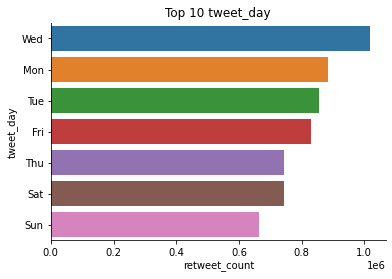

In [64]:
#plot for top retweet counts by day of week in descending order
top_refa('retweet_count','tweet_day', False)
sns.despine()

> There were higher number of retweets made on wednesday, followed by Tuesday and Monday.

 #### Favourite counts by day of tweets

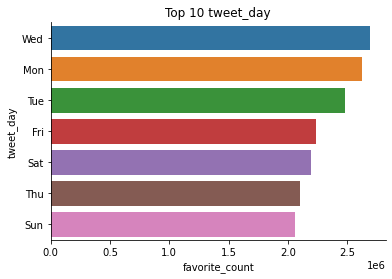

In [65]:
#plot for top favourite counts by day of week in decending order
top_refa('favorite_count','tweet_day', False)
sns.despine()

Wednesdays had higher number of favourite counts, the next day to it is Monddays

#### Insight 2: Explore the relationship between the dog ratings, retweets, favourites, img num, p1, p2 & p3.

To have a clear understanding of the relationship, it will be visualized using snspairplot with ahue over the tweet_day

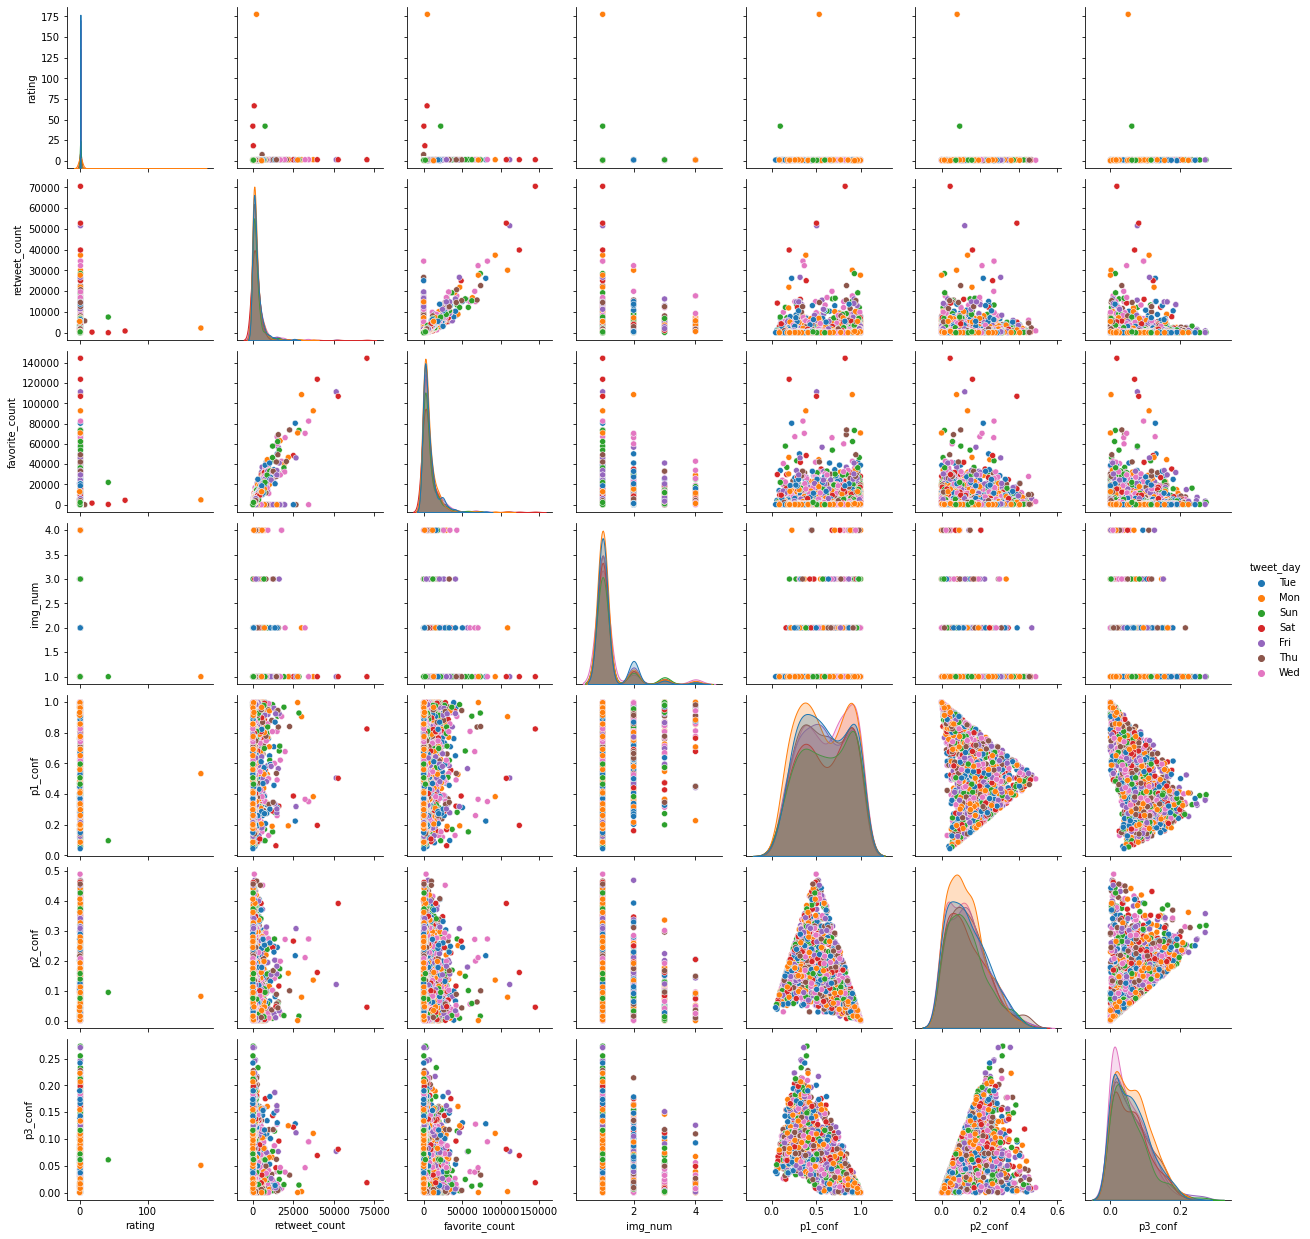

In [66]:
#sns.pairplot(df_master, vars=["rating", "retweet_count", "favorite_count", "img_num", "p1_conf", "p2_conf", "p3_conf"], hue="tweet_day")
sns.pairplot(df_twitter_master, vars =['rating', 'retweet_count', 'favorite_count', 'img_num', 'p1_conf', 'p2_conf', 'p3_conf'], hue= 'tweet_day')

In [67]:
df_twitter_master.corr().round(2)

,tweet_id,rating,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
tweet_id,1.00,0.05,0.38,0.51,0.21,0.10,0.00,-0.04
rating,0.05,1.00,0.01,0.01,0.00,-0.01,-0.01,-0.01
retweet_count,0.38,0.01,1.00,0.80,0.11,0.04,-0.00,-0.03
favorite_count,0.51,0.01,0.80,1.00,0.13,0.07,-0.02,-0.05
img_num,0.21,0.00,0.11,0.13,1.00,0.20,-0.16,-0.14
p1_conf,0.10,-0.01,0.04,0.07,0.20,1.00,-0.51,-0.71
p2_conf,0.00,-0.01,-0.00,-0.02,-0.16,-0.51,1.00,0.48
p3_conf,-0.04,-0.01,-0.03,-0.05,-0.14,-0.71,0.48,1.00


> 